In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(0)
%matplotlib inline

In [6]:
def load_data_from_file(fileName = "advertising.csv"):
    data = np.genfromtxt(fileName, dtype=None, delimiter=',', skip_header=1)
    features_X = data[:, :3]
    sales_Y = data[:, 3]
    features_X = np.hstack((np.ones((features_X.shape[0], 1)), features_X))
    return features_X, sales_Y

Q2

In [7]:
features_X, _ = load_data_from_file()
print(features_X[:5,:])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


Q3

In [8]:
_ , sales_Y = load_data_from_file()
print(sales_Y.shape)

(200,)


In [26]:
def create_random_value(bound=10):
   return random.uniform(-bound / 2, bound / 2)

def create_individual(n=4, bound=10):
   individual = []
   individual = [create_random_value() for _ in range(n)]
   return individual

individual = create_individual()
print(individual)

[0.46202163214729985, -4.007003987468351, -0.5276829830659837, 4.297830733093562]


In [27]:
def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss = np.multiply((y_hat - sales_Y), (y_hat - sales_Y)).mean()
    return loss

def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness_value = 1 / (loss + 1)
    return fitness_value

Q4

In [28]:
features_X, sales_Y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


In [29]:
def crossover(individual1, individual2, crossover_rate=0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
    
    for i in range(len(individual1)):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]
    
    return individual1_new, individual2_new

Q5

In [30]:
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
individual1, individual2 = crossover(individual1, individual2, 2.0)
print('individual1: ', individual1)
print('individual2: ', individual2)

individual1:  [3.44, 2.57, -0.79, -2.41]
individual2:  [4.09, 4.82, 3.1, 4.02]


In [31]:
def mutate(individual, mutation_rate=0.05):
   individual_m = individual.copy()
   for i in range(len(individual)):
      if random.random() < mutation_rate:
         individual_m[i] = create_random_value()
   return individual_m

Q6

In [32]:
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate = 2.0)
print(before_individual == after_individual)

False


In [33]:
def initialize_population(m):
  population = [create_individual() for _ in range(m)]
  return population

def selection(sorted_old_population, m):
    index1 = random.randint(0, m-1)
    while True:
        index2 = random.randint(0, m-1)
        if (index2 != index1):
            break
    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

In [17]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)

    if gen%1 == 0:
        print("Best loss:", compute_loss(sorted_population[m-1]), "with chromsome: ", sorted_population[m-1])

    new_population = []
    while len(new_population) < m-elitism:

        individual_s1 = selection(sorted_population, m)
        individual_s2 = selection(sorted_population, m)

        individual_t1, individual_t2 = crossover(individual_s1, individual_s2)

        individual_m1 = mutate(individual_t1)
        individual_m2 = mutate(individual_t2)

        new_population.append(individual_m1)
        new_population.append(individual_m2)

    for ind in sorted_population[m-elitism:]:
        new_population.append(ind.copy())

    return new_population, compute_loss(sorted_population[m-1])

Q7

In [34]:
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)

Best loss: 123415.051528805 with chromsome:  [3.44, 2.57, -0.79, -2.41]


Best loss: 499.4287054364574 with chromsome:  [3.331600837968306, -0.09720038244186391, 1.4498755629428342, -0.2732124726990648]
Best loss: 64.67263189599188 with chromsome:  [1.7562907486623676, 0.022221826851781756, -0.1332194184767852, 0.3274371896192978]
Best loss: 64.67263189599188 with chromsome:  [1.7562907486623676, 0.022221826851781756, -0.1332194184767852, 0.3274371896192978]
Best loss: 64.67263189599188 with chromsome:  [1.7562907486623676, 0.022221826851781756, -0.1332194184767852, 0.3274371896192978]
Best loss: 64.67263189599188 with chromsome:  [1.7562907486623676, 0.022221826851781756, -0.1332194184767852, 0.3274371896192978]


Best loss: 64.67263189599188 with chromsome:  [1.7562907486623676, 0.022221826851781756, -0.1332194184767852, 0.3274371896192978]
Best loss: 54.963713550426526 with chromsome:  [4.222958711291984, 0.022221826851781756, -0.1332194184767852, 0.3274371896192978]
Best loss: 54.963713550426526 with chromsome:  [4.222958711291984, 0.022221826851781756, -0.1332194184767852, 0.3274371896192978]
Best loss: 54.679879028382345 with chromsome:  [4.451749112134909, 0.022221826851781756, -0.1332194184767852, 0.3274371896192978]
Best loss: 54.679879028382345 with chromsome:  [4.451749112134909, 0.022221826851781756, -0.1332194184767852, 0.3274371896192978]
Best loss: 51.78788034609173 with chromsome:  [4.451749112134909, 0.03391352127992153, -0.1332194184767852, 0.3274371896192978]
Best loss: 51.78788034609173 with chromsome:  [4.451749112134909, 0.03391352127992153, -0.1332194184767852, 0.3274371896192978]
Best loss: 51.082607059850844 with chromsome:  [4.982134094851563, 0.022221826851781756, -0.13

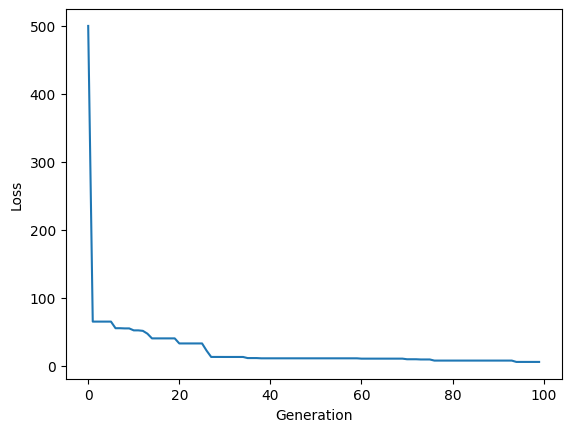

In [19]:
def run_GA():
    n_generations = 100
    m = 600
    features_X, sales_Y = load_data_from_file()
    population = initialize_population(m)
    losses_list = []
    for i in range(n_generations):
        population, losses = create_new_population(population, elitism=2, gen=i)
        losses_list.append(losses)
    return losses_list,  population

def visualize_loss(losses_list):
   plt.plot(losses_list)
   plt.xlabel('Generation')
   plt.ylabel('Loss')
   plt.show()

losses_list, population = run_GA()
visualize_loss(losses_list)

[4.9962006103448235, 0.040045749808035325, 0.10272937669118853, 0.05308835883883223]


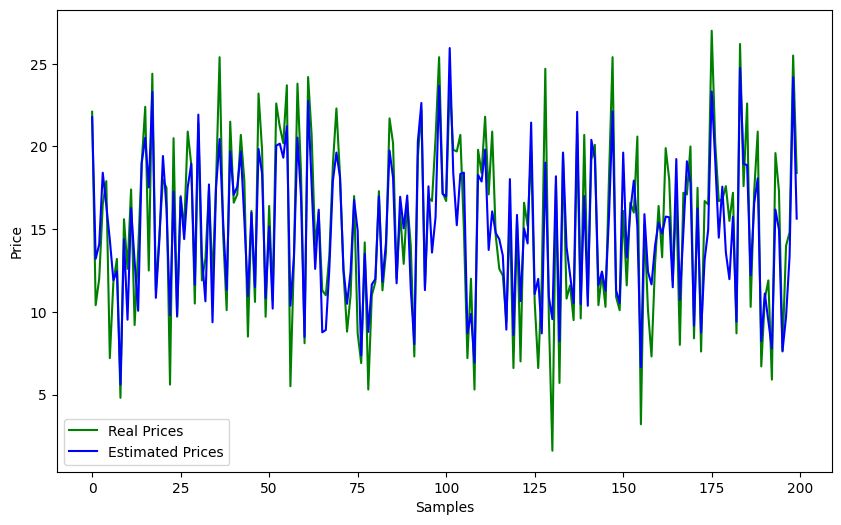

In [35]:
def visualize_predict_gt():
  sorted_population = sorted(population, key=compute_fitness)
  print(sorted_population[-1])
  theta = np.array(sorted_population[-1])

  estimated_prices = []
  for feature in features_X:
     estimated_price = sum(c*x for x,c in zip(feature, theta))
     estimated_prices.append(estimated_price)

  fig, ax = plt.subplots(figsize=(10, 6))
  plt.xlabel('Samples')
  plt.ylabel('Price')
  plt.plot(sales_Y, c='green', label='Real Prices')
  plt.plot(estimated_prices, c='blue', label='Estimated Prices')
  plt.legend()
  plt.show()

visualize_predict_gt()